In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/bidirectional_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 178s 13ms/step


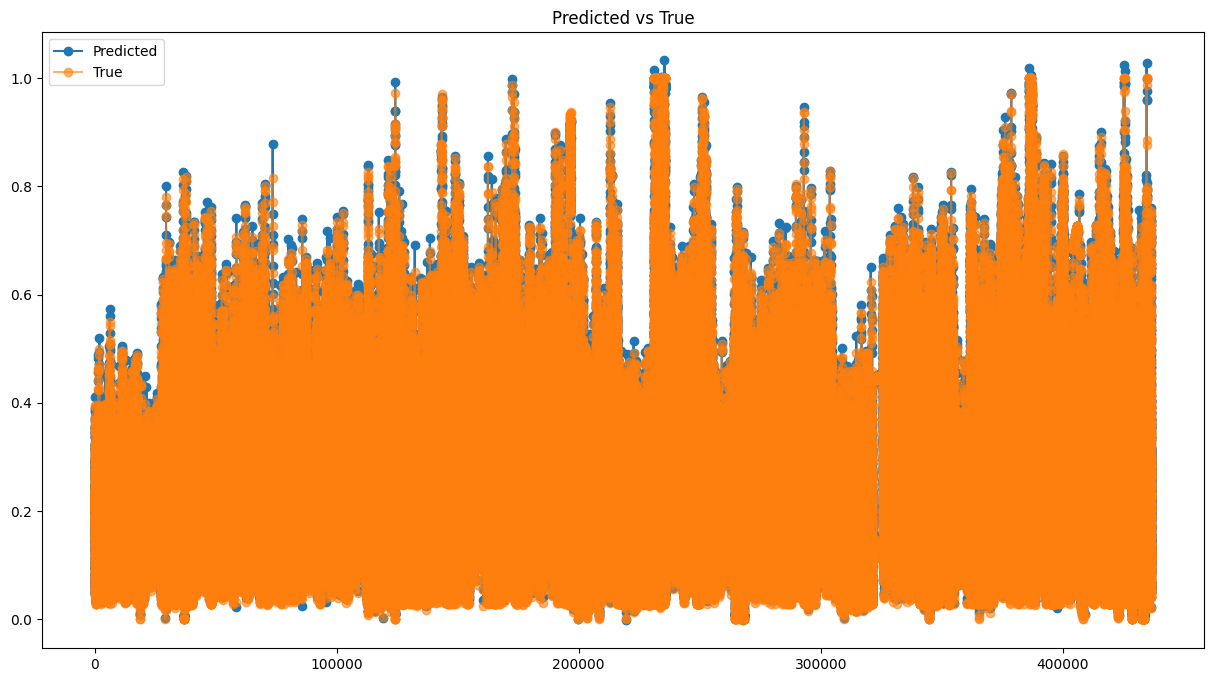

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011703119613193617,
 'mse': 0.016924992152039613,
 'rmse': 0.0002864553593466025}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          142.442169
1          139.252884
2          139.950943
3          138.033203
4          151.748199
...               ...
436598     125.596825
436599     163.917267
436600     203.082474
436601     206.026260
436602     230.939423

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  142.442169
2023-01-01 00:15:00   140.0  139.252884
2023-01-01 00:30:00   139.0  139.950943
2023-01-01 00:45:00   145.0  138.033203
2023-01-01 01:00:00   159.0  151.748199
...                     ...         ...
2035-06-14 21:30:00   137.0  125.596825
2035-06-14 21:45:00   177.0  163.917267
2035-06-14 22:00:00   198.0  203.082474
2035-06-14 22:15:00   216.0  206.026260
2035-06-14 22:30:00   233.0  230.939423

[436603 rows x 2 columns]

AP, BE, EP: (0.9849221945845416, 0.012375115093380242, 0.0027026903220782315)


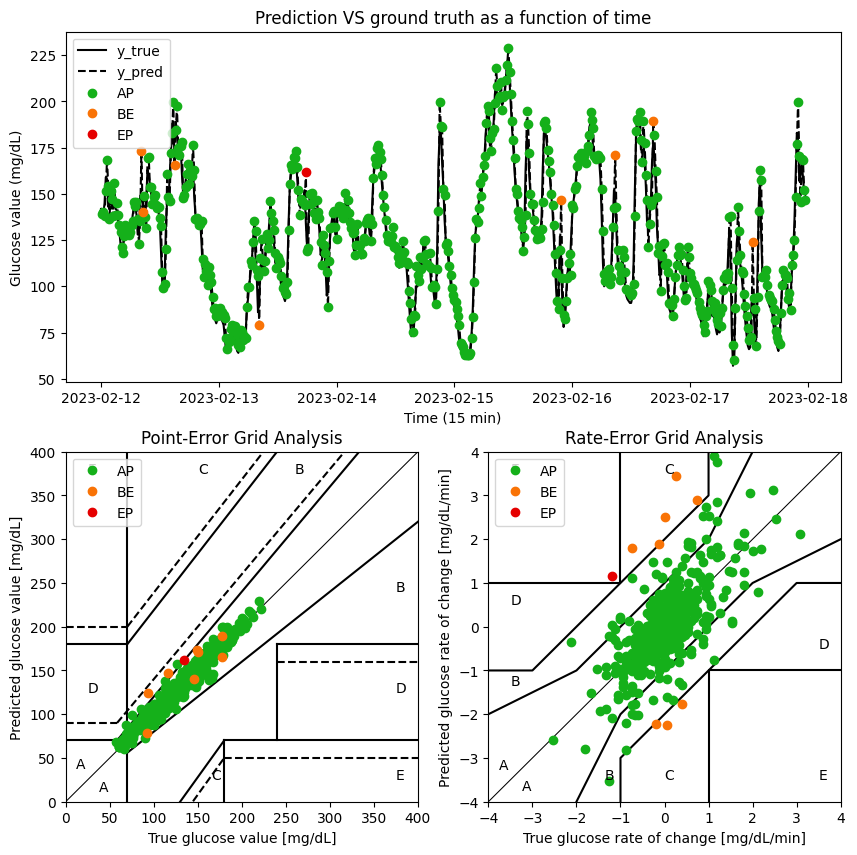

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  142.442169       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  139.252884 -0.066667 -0.212619     AP   
2      2023-02-12 00:30:00   139.0  139.950943 -0.066667  0.046537     AP   
3      2023-02-12 00:45:00   145.0  138.033203  0.400000 -0.127849     AP   
4      2023-02-12 01:00:00   159.0  151.748199  0.933333  0.914333     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  125.596825  2.333333  2.378705     AP   
436599 2035-07-26 21:45:00   177.0  163.917267  2.666667  2.554696     AP   
436600 2035-07-26 22:00:00   198.0  203.082474  1.400000  2.611014     AP   
436601 2035-07-26 22:15:00   216.0  206.026260  1.200000  0.196252     AP   
436602 2035-07-26 22:30:00   233.0  230.939423  1.133333  1.660877     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 27ms/step


Glucose level Predict  Glucose level True
0               0.222700            0.219565
1               0.215767            0.217391

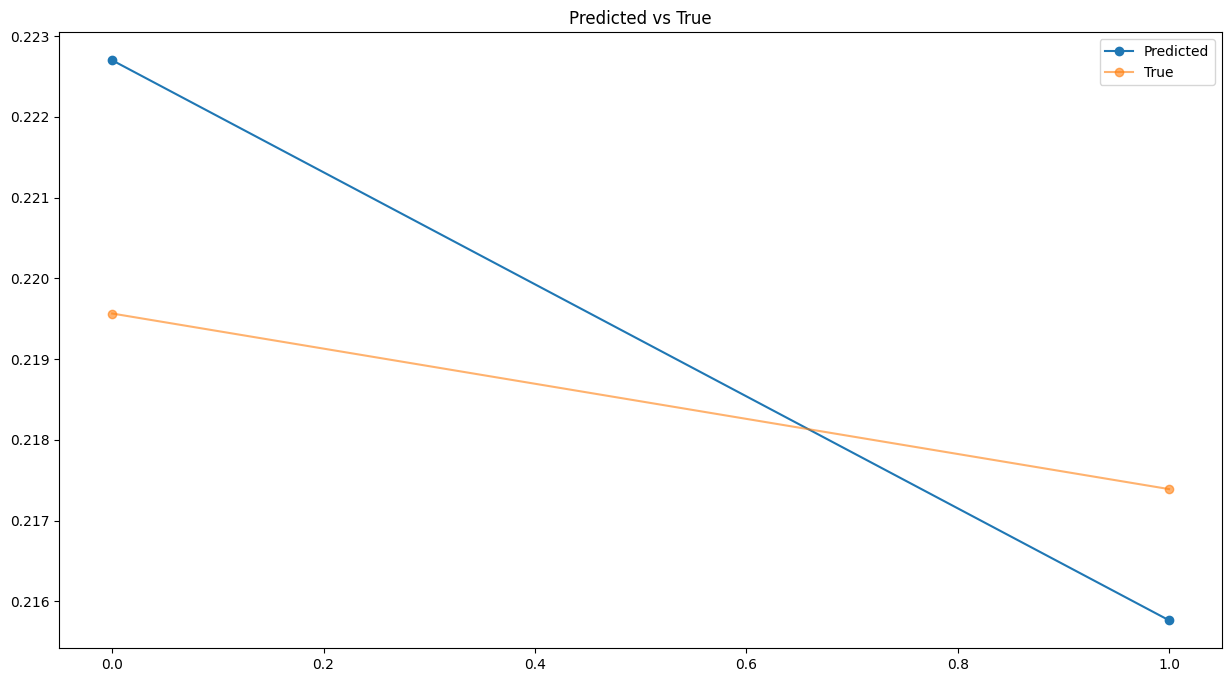

{'mae': 0.0023796645195587884,
 'mse': 0.002496711639654868,
 'rmse': 6.2335690115881e-06}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.442169               141.0
1             139.252884               140.0

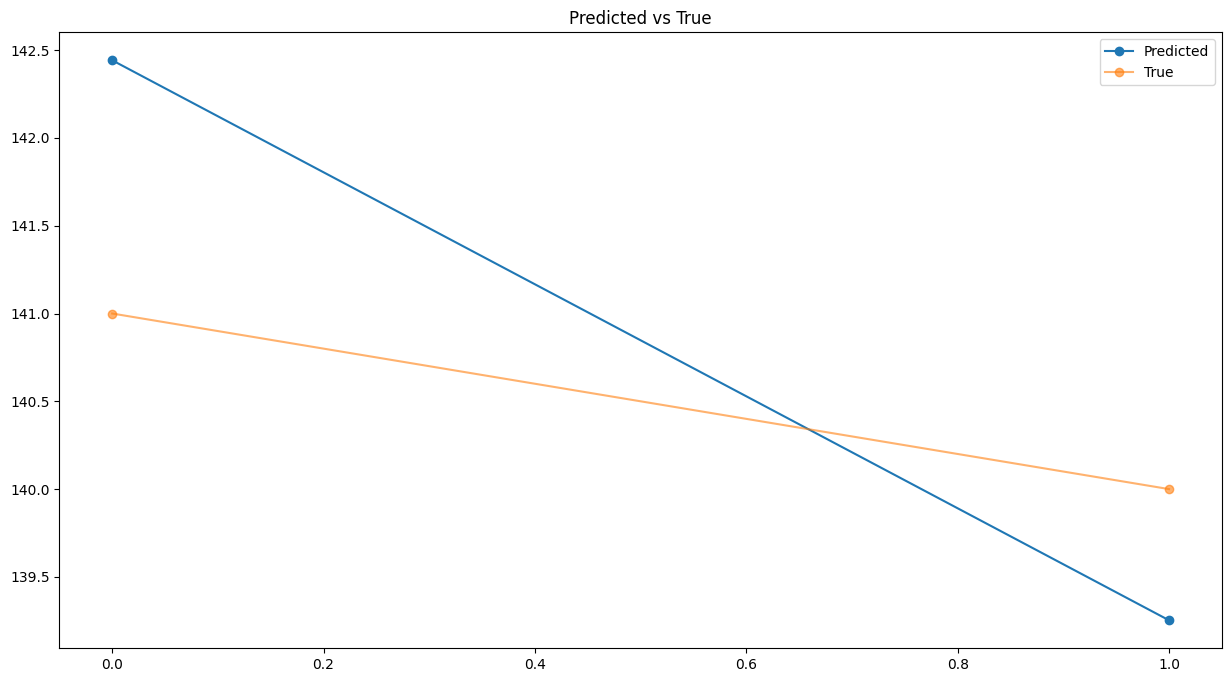

{'mae': 1.0946426391601562,
 'mse': 1.1484847454912248,
 'rmse': 1.3190172106260434}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 25ms/step


Glucose level Predict  Glucose level True
0               0.222700            0.219565
1               0.222442            0.217391

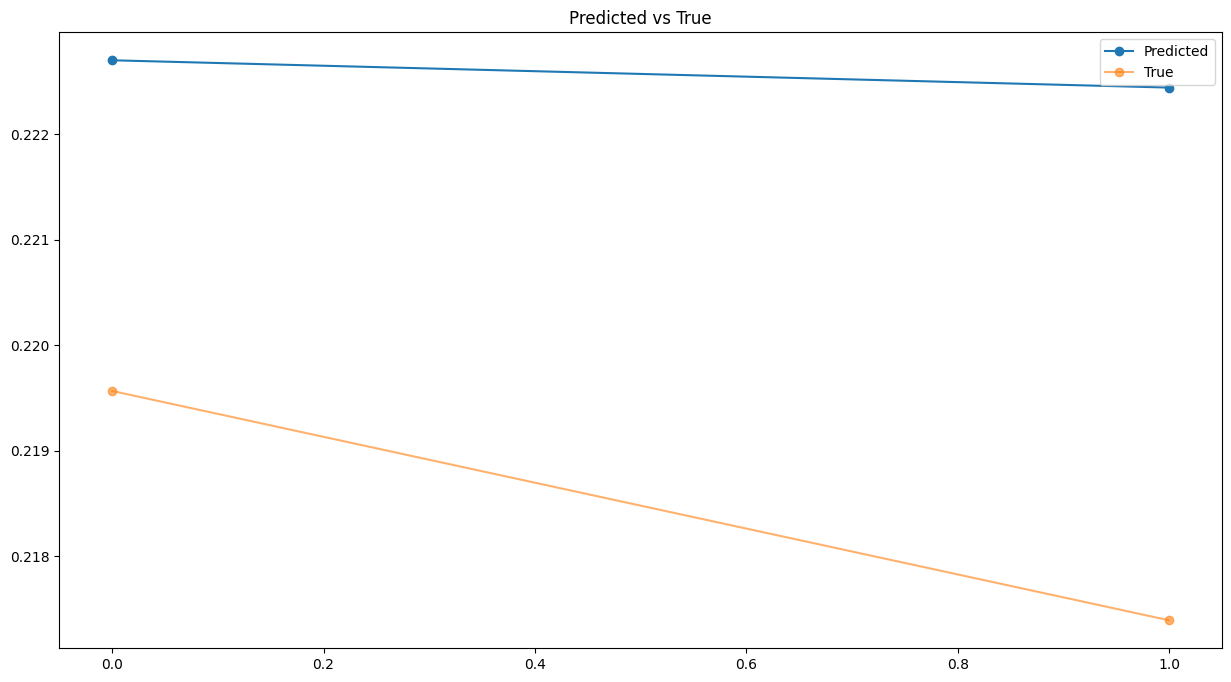

{'mae': 0.004092694883761183,
 'mse': 0.004203217118122204,
 'rmse': 1.7667034142075528e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.442169               141.0
1             142.323105               140.0

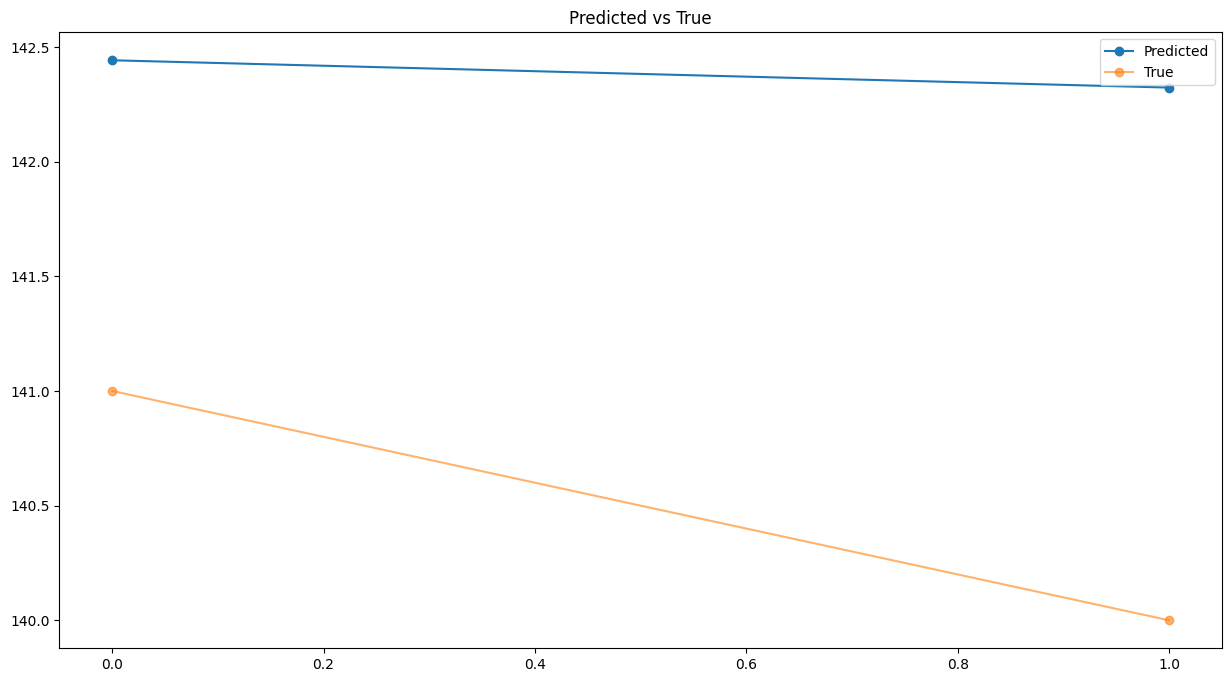

{'mae': 1.8826370239257812,
 'mse': 1.9334771984849353,
 'rmse': 3.738334077061154}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.230121            0.182609
1               0.151377            0.154348
2               0.155687            0.152174
3               0.154581            0.150000
4               0.150991            0.123913

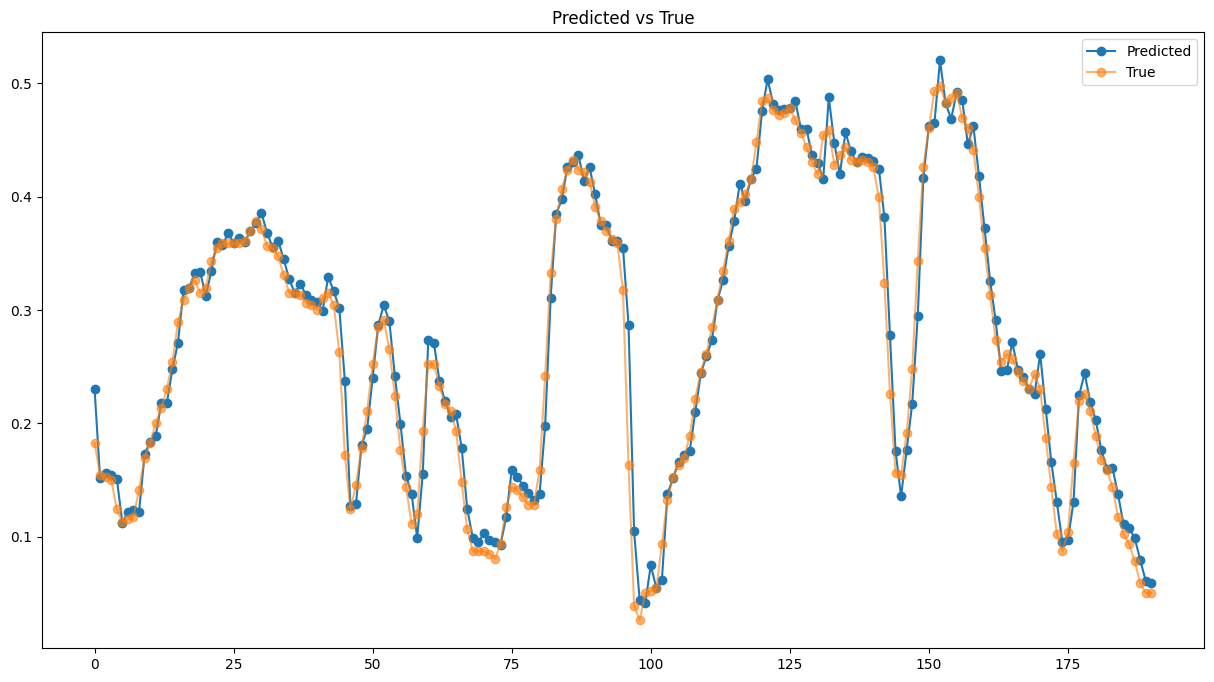

{'mae': 0.013755218207924339,
 'mse': 0.01992360761015639,
 'rmse': 0.00039695014020348155}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

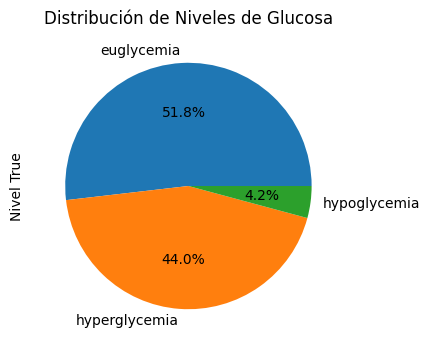

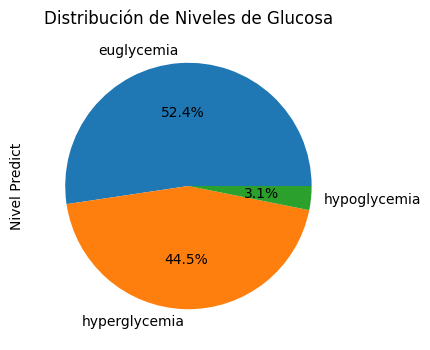

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             145.855621    euglycemia
1               111.0  euglycemia             109.633377    euglycemia
2               110.0  euglycemia             111.616043    euglycemia
3               109.0  euglycemia             111.107384    euglycemia
4                97.0  euglycemia             109.455902    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


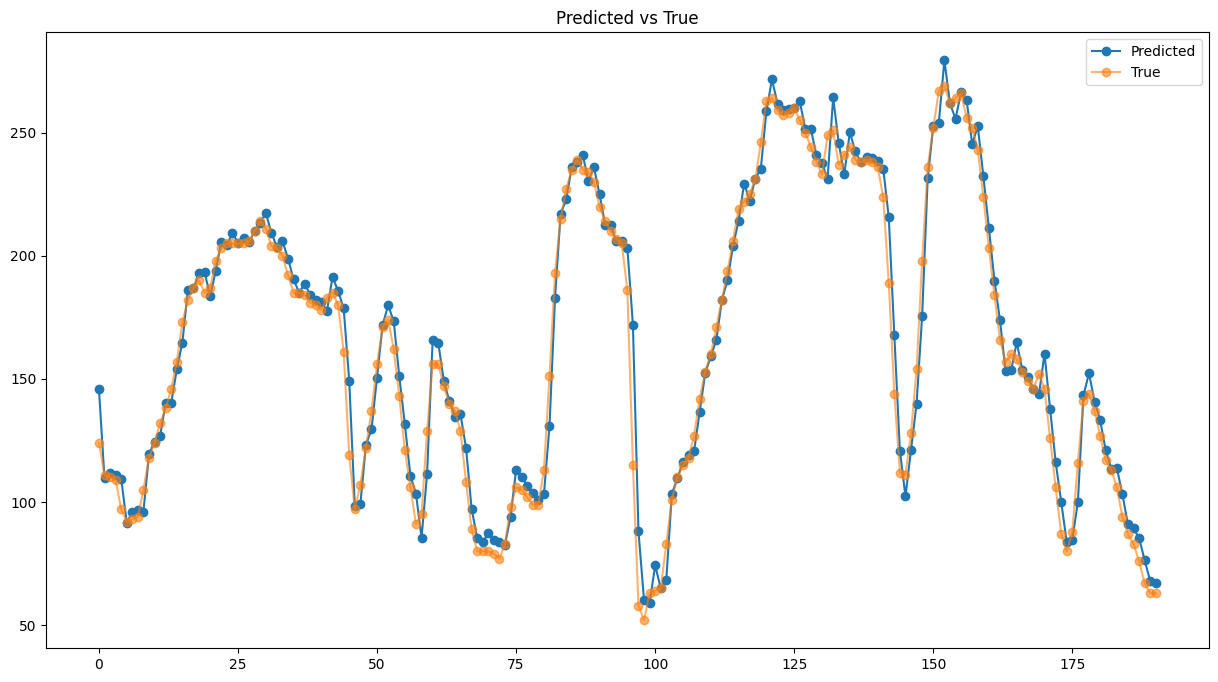

{'mae': 6.32740054704756, 'mse': 9.164860193336157, 'rmse': 83.99466236339767}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  145.855621
2023-01-01 00:15:00   111.0  109.633377
2023-01-01 00:30:00   110.0  111.616043
2023-01-01 00:45:00   109.0  111.107384
2023-01-01 01:00:00    97.0  109.455902
...                     ...         ...
2023-01-02 22:30:00    83.0   89.275620
2023-01-02 22:45:00    76.0   85.423706
2023-01-02 23:00:00    67.0   76.430534
2023-01-02 23:15:00    63.0   67.884163
2023-01-02 23:30:00    63.0   67.094627

[191 rows x 2 columns]

AP, BE, EP: (0.9947368421052631, 0.005263157894736842, 0.0)


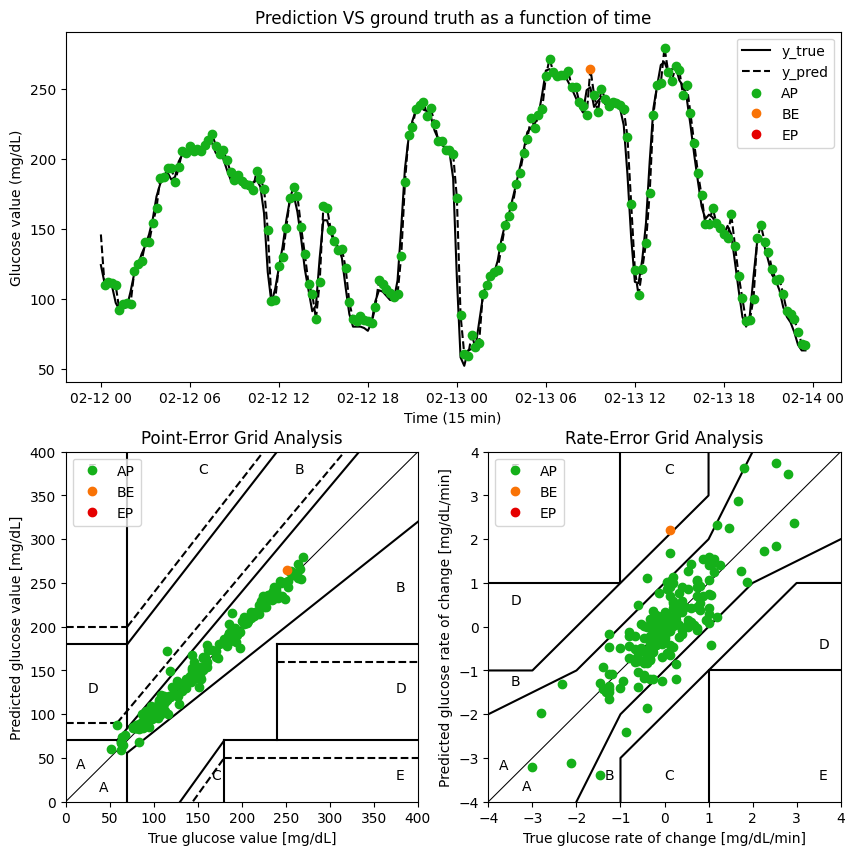

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.372537            0.373913
1               0.391022            0.400000
2               0.421958            0.404348
3               0.404900            0.406522
4               0.416601            0.397826

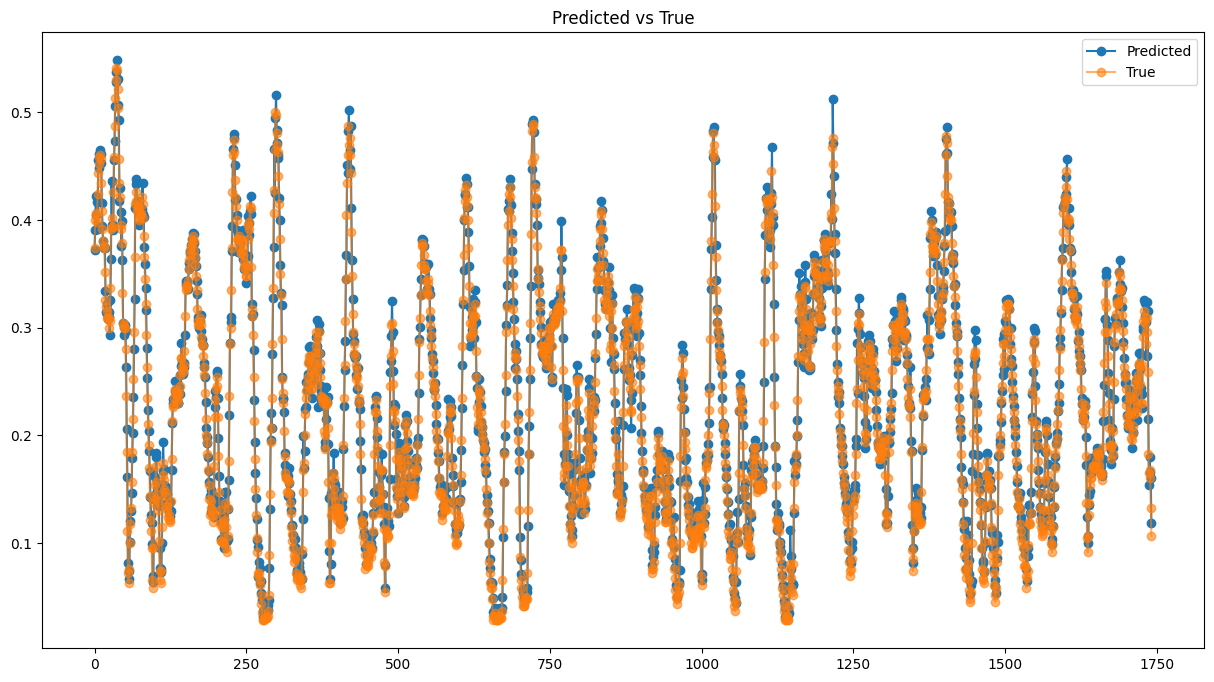

{'mae': 0.010239599813377421,
 'mse': 0.01322849365238691,
 'rmse': 0.00017499304431124074}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

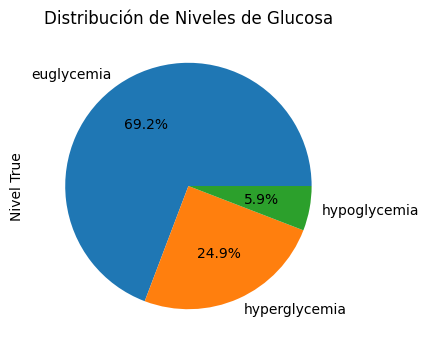

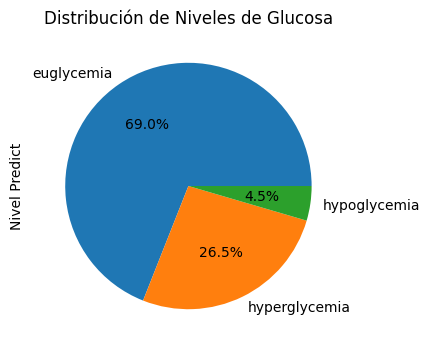

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             211.366852  hyperglycemia
1               224.0  hyperglycemia             219.869980  hyperglycemia
2               226.0  hyperglycemia             234.100601  hyperglycemia
3               227.0  hyperglycemia             226.253967  hyperglycemia
4               223.0  hyperglycemia             231.636581  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


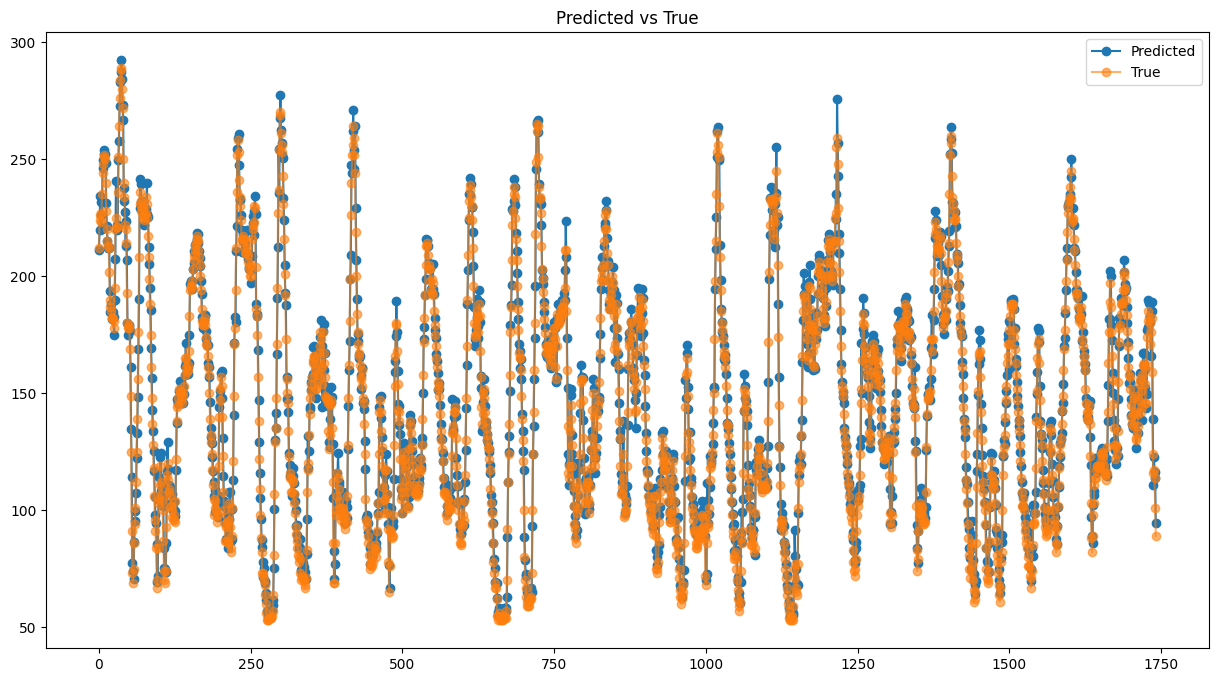

{'mae': 4.710215948917288, 'mse': 6.085106940712626, 'rmse': 37.02852647990897}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  211.366852
2023-01-01 00:15:00   224.0  219.869980
2023-01-01 00:30:00   226.0  234.100601
2023-01-01 00:45:00   227.0  226.253967
2023-01-01 01:00:00   223.0  231.636581
...                     ...         ...
2023-01-19 02:15:00   116.0  110.813515
2023-01-19 02:30:00   117.0  122.773903
2023-01-19 02:45:00   114.0  116.385986
2023-01-19 03:00:00   101.0  113.876686
2023-01-19 03:15:00    89.0   94.719162

[1742 rows x 2 columns]

AP, BE, EP: (0.9942561746122918, 0.004595060310166571, 0.0011487650775416428)


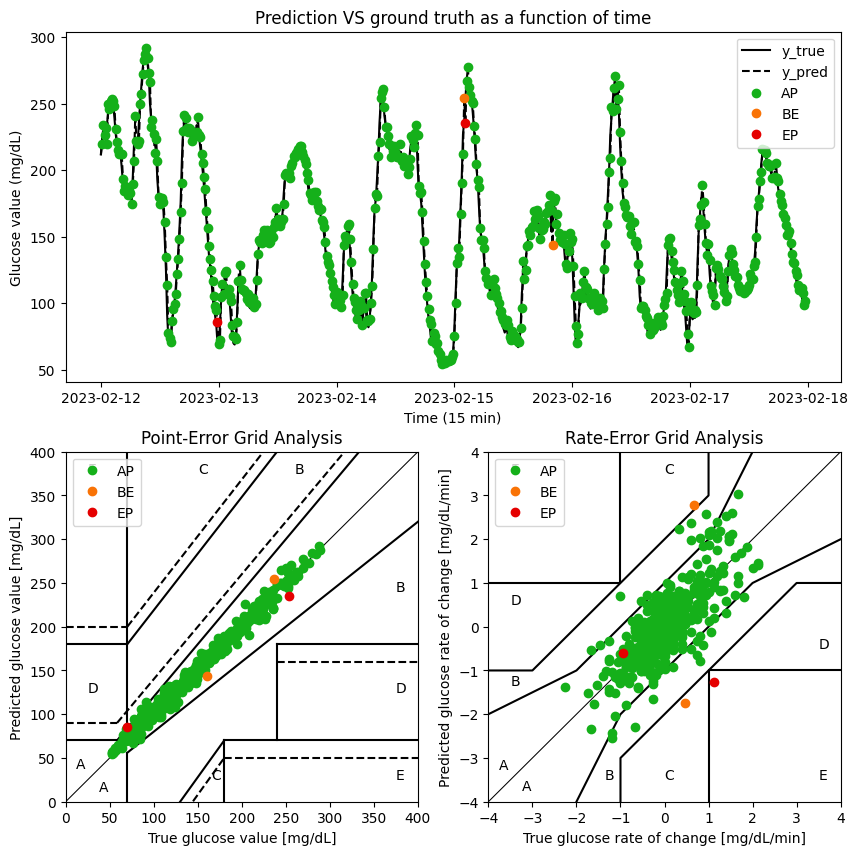

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.269384            0.261858
1               0.237416            0.229051
2               0.205503            0.196245
3               0.175557            0.163439
4               0.147995            0.130632

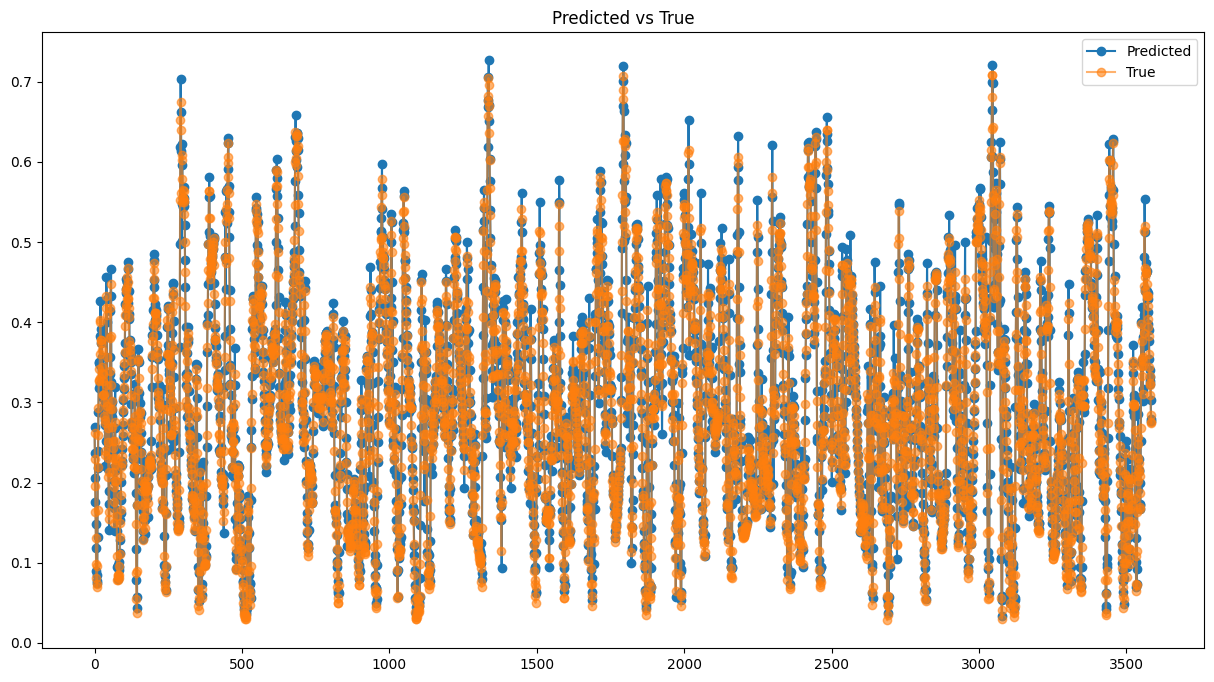

{'mae': 0.014666459916340253,
 'mse': 0.020344604780414634,
 'rmse': 0.00041390294367127004}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

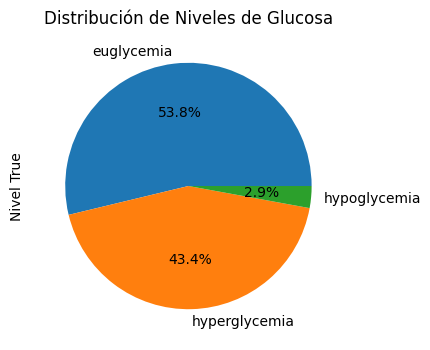

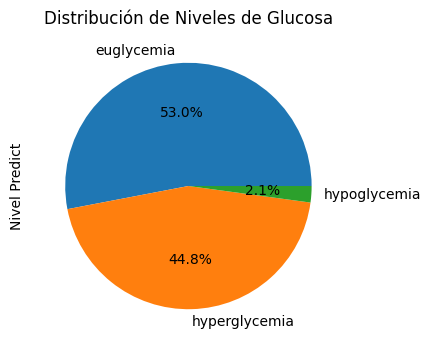

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             163.916855    euglycemia
1          145.363636  euglycemia             149.211502    euglycemia
2          130.272727  euglycemia             134.531387    euglycemia
3          115.181818  euglycemia             120.756325    euglycemia
4          100.090909  euglycemia             108.077637    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


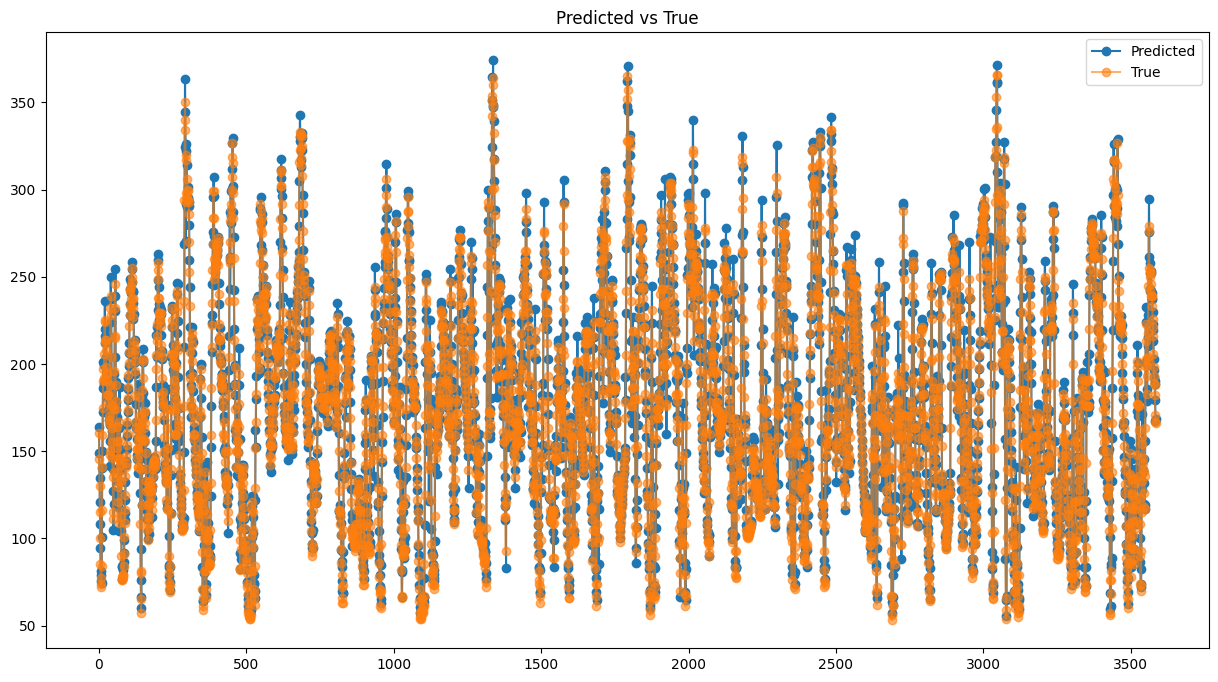

{'mae': 6.746571634879595, 'mse': 9.358517988802003, 'rmse': 87.58185894673069}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  163.916855
2023-01-01 00:15:00  145.363636  149.211502
2023-01-01 00:30:00  130.272727  134.531387
2023-01-01 00:45:00  115.181818  120.756325
2023-01-01 01:00:00  100.090909  108.077637
...                         ...         ...
2023-02-07 07:15:00  188.000000  188.467651
2023-02-07 07:30:00  182.000000  190.485474
2023-02-07 07:45:00  171.000000  179.567413
2023-02-07 08:00:00  167.000000  167.295425
2023-02-07 08:15:00  166.000000  168.570557

[3586 rows x 2 columns]

AP, BE, EP: (0.9721059972105998, 0.023709902370990237, 0.0041841004184100415)


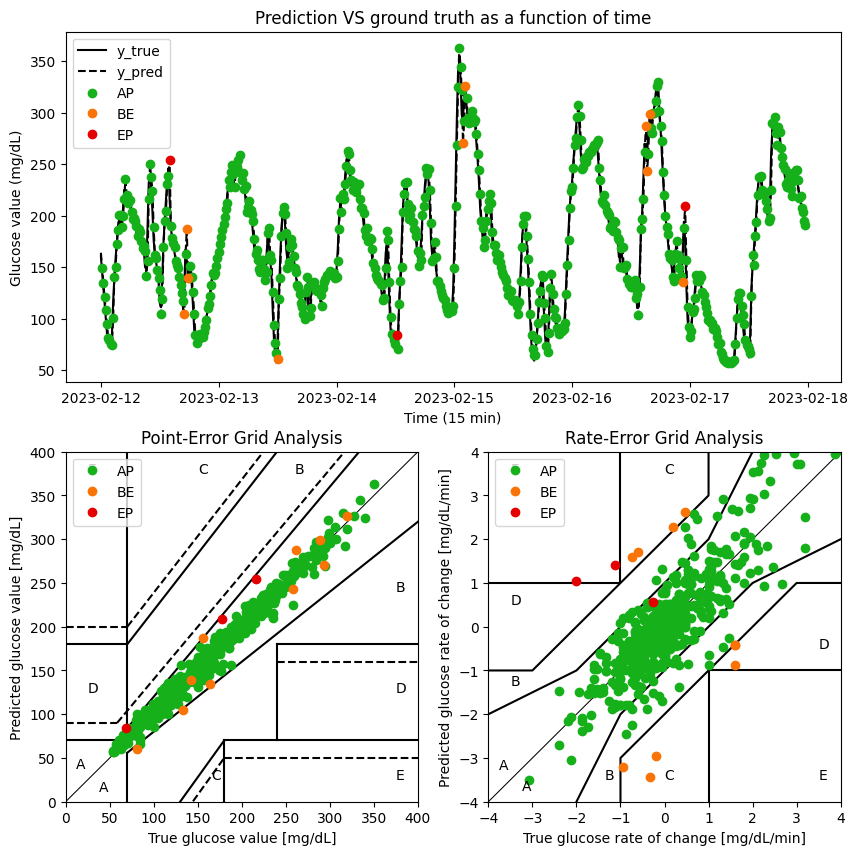

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 5ms/step


Glucose level Predict  Glucose level True
0               0.546862            0.534783
1               0.528423            0.500000
2               0.473339            0.484783
3               0.486197            0.463043
4               0.440360            0.428261

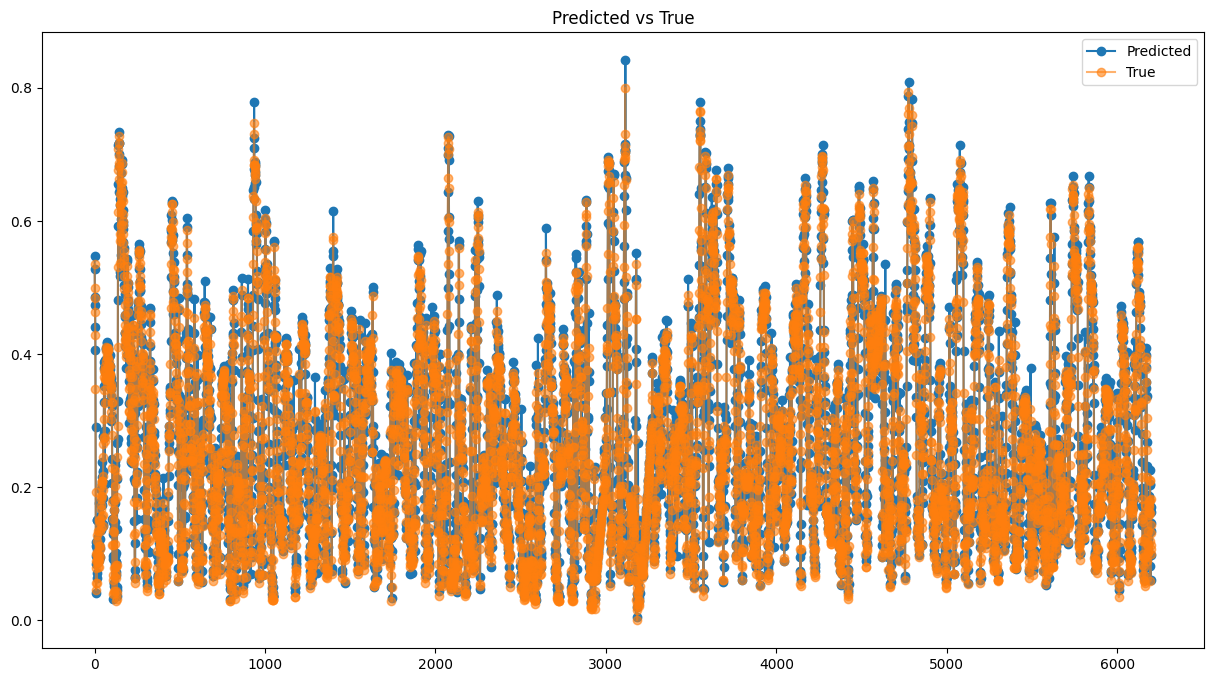

{'mae': 0.01674192972218795,
 'mse': 0.023847207456476713,
 'rmse': 0.0005686893034722386}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

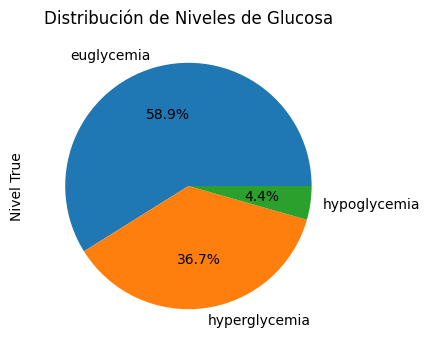

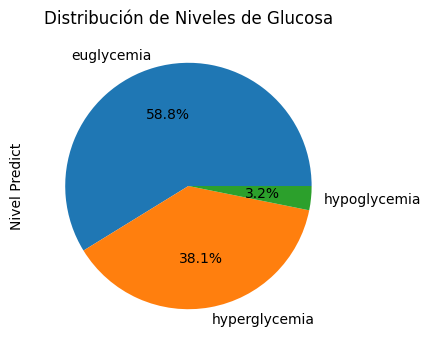

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             291.556335  hyperglycemia
1               270.0  hyperglycemia             283.074432  hyperglycemia
2               263.0  hyperglycemia             257.736115  hyperglycemia
3               253.0  hyperglycemia             263.650452  hyperglycemia
4               237.0  hyperglycemia             242.565628  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


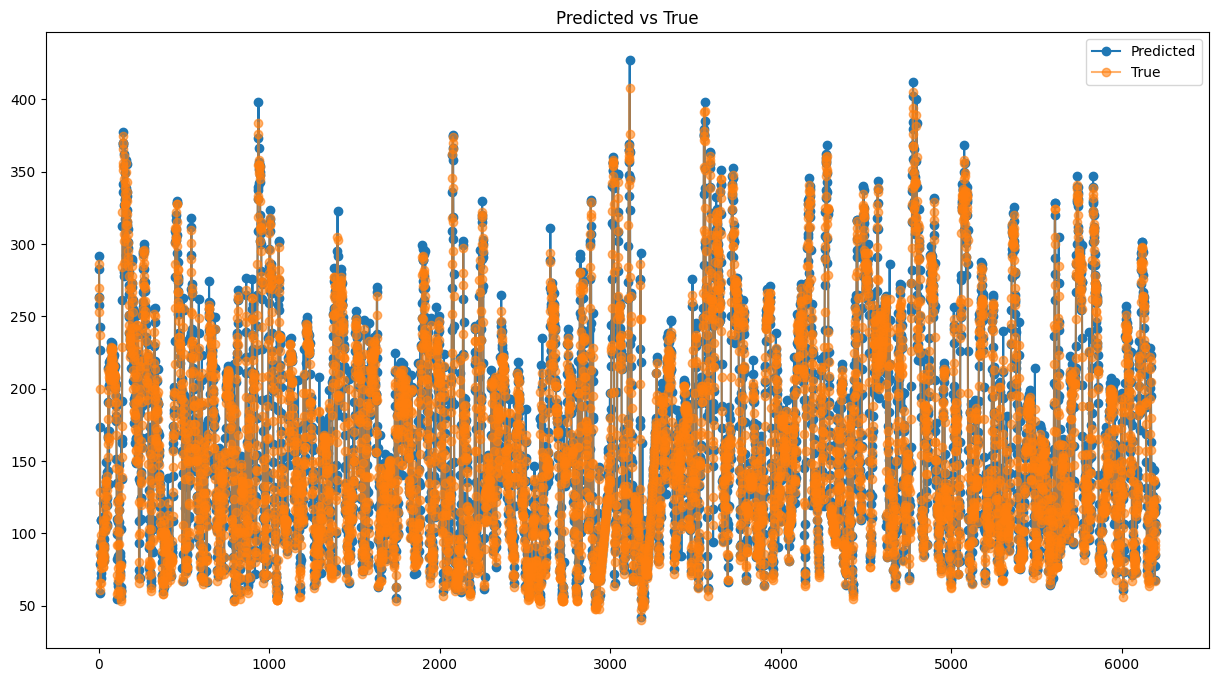

{'mae': 7.7012877122937295,
 'mse': 10.96971540282142,
 'rmse': 120.33465601889752}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  291.556335
2023-01-01 00:15:00   270.0  283.074432
2023-01-01 00:30:00   263.0  257.736115
2023-01-01 00:45:00   253.0  263.650452
2023-01-01 01:00:00   237.0  242.565628
...                     ...         ...
2023-03-06 13:00:00   100.0  114.832809
2023-03-06 13:15:00    89.0  107.367554
2023-03-06 13:30:00    92.0   85.176895
2023-03-06 13:45:00   106.0  101.392456
2023-03-06 14:00:00   124.0  118.549644

[6201 rows x 2 columns]

AP, BE, EP: (0.9659677419354838, 0.027580645161290322, 0.0064516129032258064)


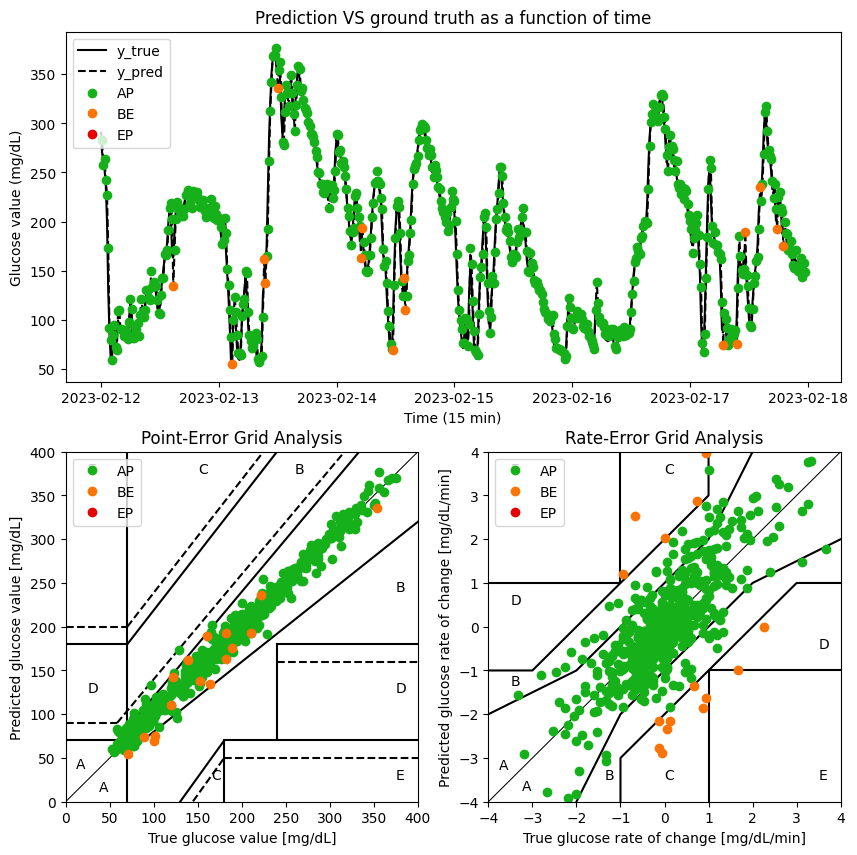

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)